# Relationship Between Diabetes and Obesity


## Introduction

Diabetes is a prevalent disease which has dramatically increased in recent years. With advances in healthcare, it would be assumed that the general population is healthy. However, obesity is on the rise and the relationship between the two increasing trends will be investigated. 

Obesity is quantified through body mass index (BMI) which takes into account a person's height and weight to measure if an individual is healthy. Ideally, an individual will be in the range of 18.5 to 24.9. Although significant research has been done on BMI being an underlying factor of diabetes, this study aims to obtain a quantifiable number in the difference in BMI between a diabetic and nondiabetic which will benefit future research. Thus, the research question is: **Is the average (mean) BMI value of people with diabetes higher than those who do not have diabetes?**
 
The dataset was obtained from the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) consisting of participants that were females at least 21 years old and their health statistics. The *BMI* variable (kg/m^2) will be split into two groups based on the *outcome* variable (TRUE indicating diabetic, and FALSE indicating non-diabetic) in order to conduct analysis of mean and confidence interval.


## Preliminary Results

In [1]:
library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(tidyverse)
library(datateachr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()



In [2]:
set.seed(999)
options(repr.plot.width = 15, repr.plot.height = 10) 

In [3]:
# dataset read from the web ------------------------------------------------------------
diabetes <- read_csv('https://raw.githubusercontent.com/Kayleeli/STAT201-Group-23/main/data/diabetes.csv') 
head(diabetes, n = 2)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (8): pregnancies, glucose, bloodpressure, skinthickness, insulin, bmi, d...
lgl (1): outcome

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
6,148,72,35,0,33.6,0.627,50,TRUE
1,85,66,29,0,26.6,0.351,31,FALSE


In [4]:
# clean + wrangled the data into tidy format ------------------------------------------

    # because we only want to focus on the relationship between bmi + outcome, selecting only:
        # 1) bmi column : body mass index in kg/m^2
        # 2) outcome column : TRUE = diabetic , FALSE = Non-diabetic

diabetes <- diabetes %>%
    select(bmi, outcome)


In [5]:
# plot relevant data + compute estimates of the parameter identified -------------------

    # splitting people into 2 groups based on "outcome" (TRUE (diabetic) vs FALSE (non-diabetic))

diabetic_group <- diabetes %>%
    filter(outcome=="TRUE") %>%
    select(bmi)

nondiabetic_group <- diabetes %>%
    filter(outcome=="FALSE") %>%
    select(bmi)

head(diabetic_group, n = 2)
head(nondiabetic_group, n = 2)

bmi
<dbl>
33.6
23.3


bmi
<dbl>
26.6
28.1


In [6]:
# SAMPLE PARAMETER

    # mean bmi values for people who are diabetic in this dataset
    diabetic_group_mean <- diabetic_group %>%
        summarize(mean = mean(bmi)) %>%
        pull()

    # mean bmi values for people who are non-diabetic in this dataset
    nondiabetic_group_mean <- nondiabetic_group %>%
        summarize(mean = mean(bmi)) %>%
        pull()

    # difference in mean bmi value for people with and without diabetes in this dataset
    difference_in_mean_pop <- diabetic_group_mean - nondiabetic_group_mean

    # summary of the population parameter calcuated above into a dataframe
    pop_parameter_summary <- matrix(c(diabetic_group_mean, nondiabetic_group_mean, difference_in_mean_pop), ncol = 3, byrow = TRUE) 
    colnames(pop_parameter_summary) <- c("Mean BMI (Diabetic)", "Mean BMI (Non-Diabetic)", "Difference in BMI ((Diabetic)-(Non-Diabetic))")
    rownames(pop_parameter_summary) <- c('Values (in kg/m^2)')
    table_pop_parameter_summary <- as.data.frame(pop_parameter_summary)


# POPULATION PARAMETER VALUES (SUMMARY)
table_pop_parameter_summary

,Mean BMI (Diabetic),Mean BMI (Non-Diabetic),Difference in BMI ((Diabetic)-(Non-Diabetic))
,<dbl>,<dbl>,<dbl>
Values (in kg/m^2),35.14254,30.3042,4.838337


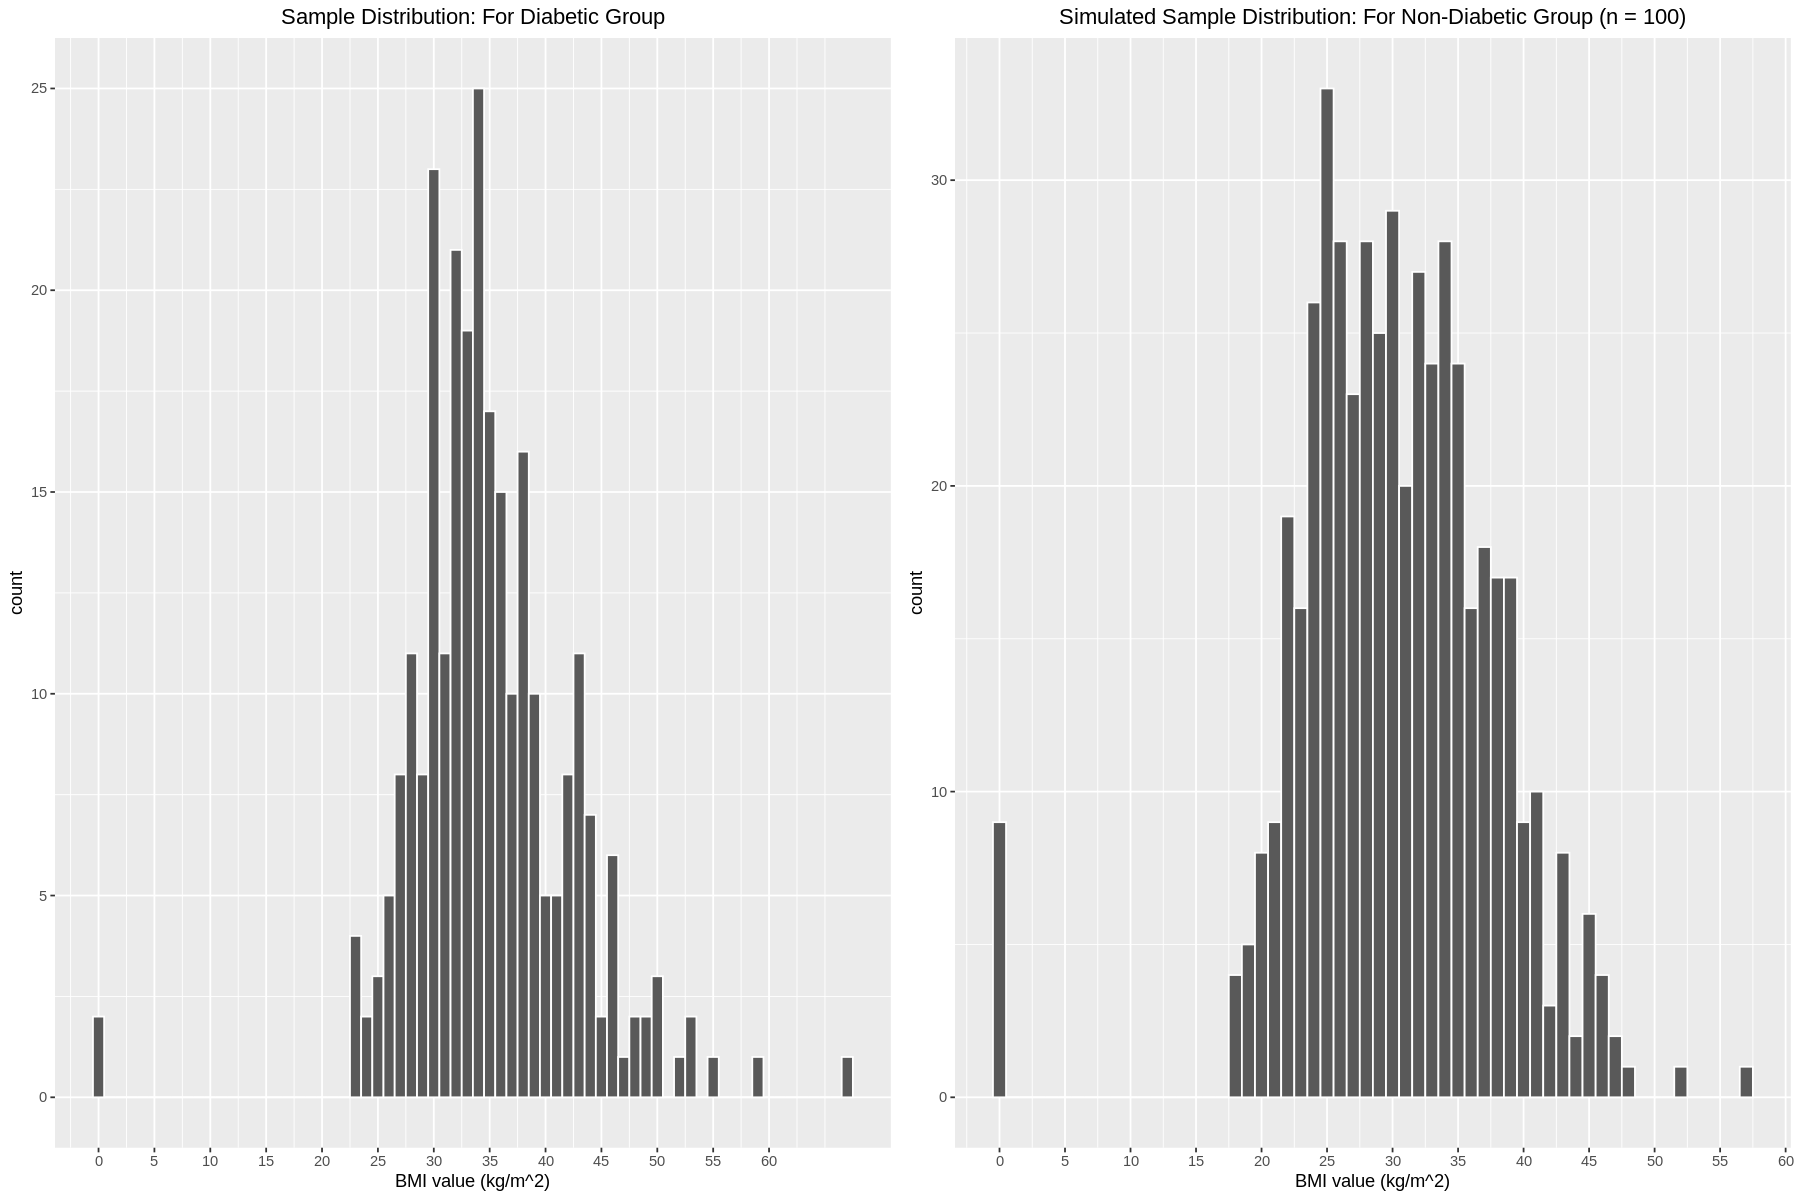

In [23]:
# SAMPLE DISTRIBUTION

        ## Histogram : SAMPLE Distribution <diabetic>
        diabetics_sample_hist <- diabetic_group %>%
                ggplot(aes(x=bmi))+
                geom_histogram(binwidth=1, color="white")+
                labs(x="BMI value (kg/m^2)")+
                ggtitle("Sample Distribution: For Diabetic Group") +
                theme(plot.title = element_text(hjust = 0.5)) +
                scale_x_continuous(breaks=seq(0,60, 5))

        ## Histogram :  SAMPLE Distribution <non-diabetic>
        nondiabetics_sample_hist <- nondiabetic_group %>%
                ggplot(aes(x=bmi))+
                geom_histogram(binwidth=1, color="white")+
                labs(x="BMI value (kg/m^2)")+
                ggtitle("Simulated Sample Distribution: For Non-Diabetic Group (n = 100)") +
                theme(plot.title = element_text(hjust = 0.5)) +
                scale_x_continuous(breaks=seq(0,60, 5))


# Histogram of SAMPLE distribution
plot_grid(diabetics_sample_hist, nondiabetics_sample_hist)

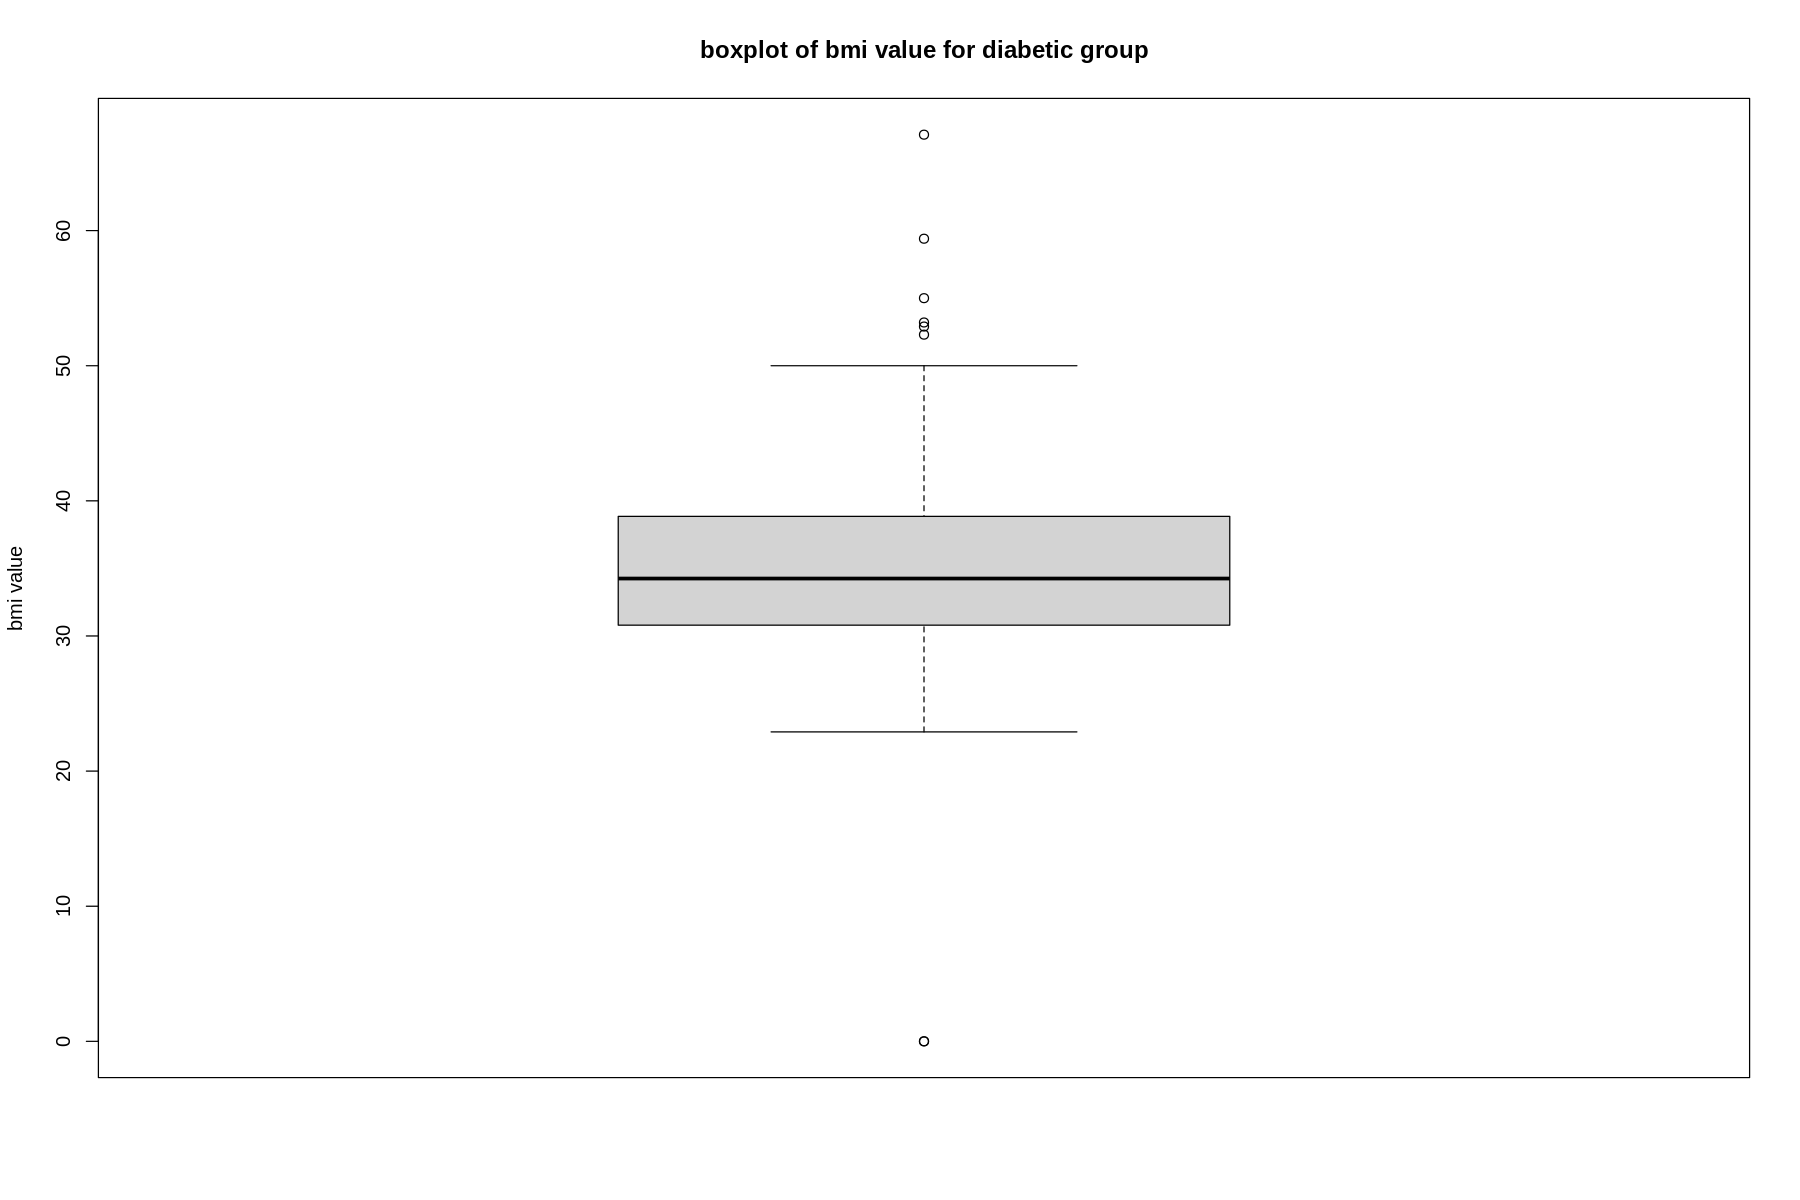

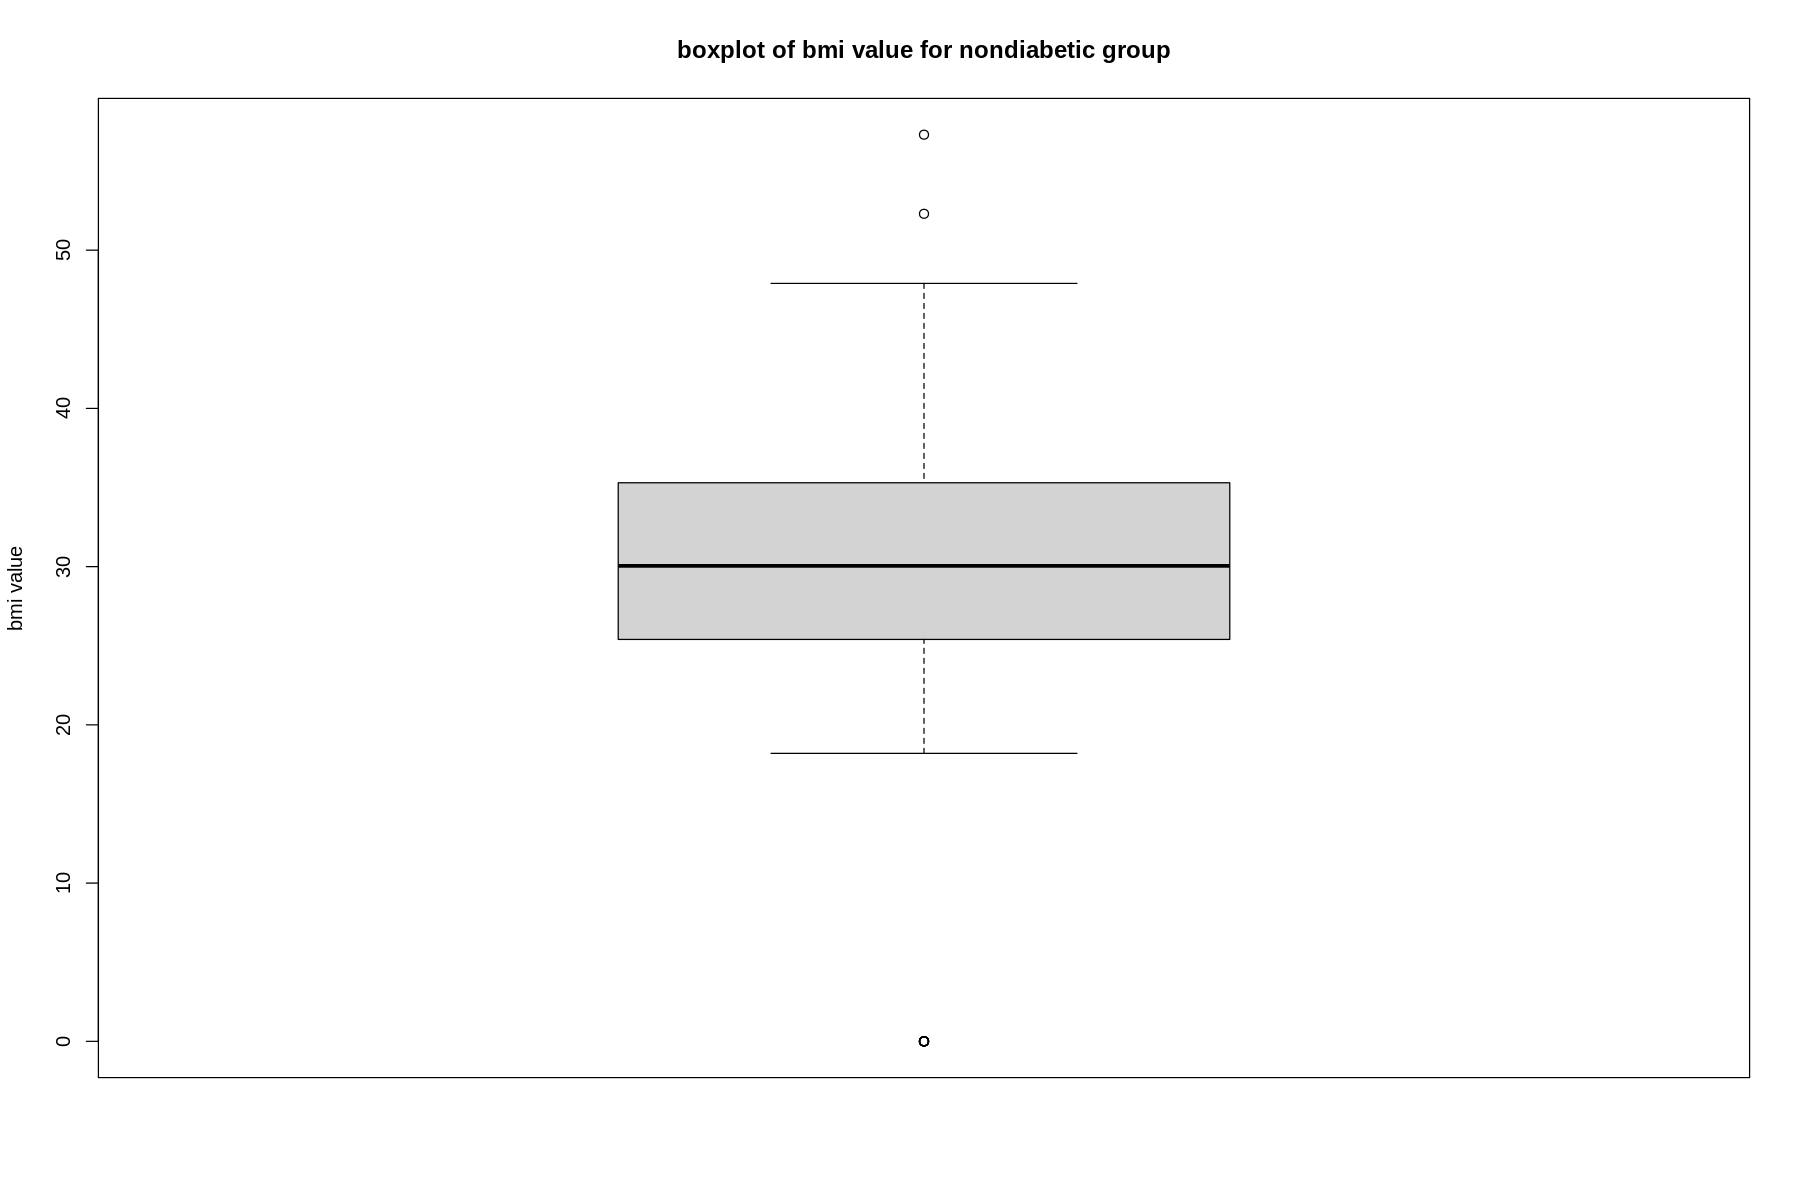

In [19]:
# BOXPLOT

# FOR DIABETIC GROUP:

BOXPLOT_DIABETIC <- boxplot(diabetic_group$bmi,
                            main= "boxplot of bmi value for diabetic group",
                            ylab= "bmi value")
                  
# FOR NON-DIABETIC GROUP:

BOXPLOT_NON_DIABETIC <- boxplot(nondiabetic_group$bmi,
                                 main= "boxplot of bmi value for nondiabetic group",
                            ylab= "bmi value")



In [ ]:
# We found the BMI value in non-diabetic group is lower than that of diabetic group based on the bootstrap distributions above.
# The difference in mean (by how much, and regarding how much confidence and significant our result is) will be study further in our analysis. 

## Method/Plan

Bootstrapping and hypothesis testing via randomization will be used to conduct this inferential study. Let m1 be the mean BMI value for females with diabetes, and m2 be the mean BMI value for females without diabetes with the following hypothesis:


<center>
$$ \text{Null Hypothesis} : m_1 - m_2 = 0 $$

    
$$ \text{Alternative hypothesis}: m_1-m_2 > 0 $$ 

</center>

A random sample of size 100 was created using the R programming language to produce an observed bootstrap sampling distribution which is symmetrical and normal. As a result the sample size is sufficient and is both representative of the population and unbiased. Thus, the estimate's result is likely generalizable to the broader population. Furthermore, this data is taken from the NIDDK, ensuring its authenticity and validity.
 
However, since this study infers the population based on sample data, the plots and estimates produced aren't sufficient to provide to a stakeholder. To address this gap, a broader confidence interval (with a 95% confidence level) will be constructed along with the correlated margin of error in order to ensure the true difference in means is included. Furthermore, a hypothesis test with a  p-value of 5% significance level will be conducted.

Through this study, it is predicted that people with diabetes have higher BMI mean value than those who do not have diabetes. In other words, any increase in BMI above normal weight levels is associated with an increased risk of being diagnosed as having complications of diabetes.

Given the considerable health and financial costs associated with diabetes, these findings have important policy-forming formulations, which help improve early evaluation and management of risk factors leading to diabetes. Future studies may investigate the effect of abdominal obesity on diabetes, as well as the relationship between food environment and diabetes. 


## References

Huang, J. (2015). Commentary on “Relation between BMI and Diabetes Mellitus and Its
Complications among US Older Adults”. Southern Medical Journal, 108 (1), 37-38. doi: 10.14423/SMJ.0000000000000215.

Gray, N. , Picone, G. , Sloan, F. & Yashkin, A. (2015). Relation between BMI and Diabetes 
Mellitus and Its Complications among US Older Adults. Southern Medical Journal, 108 (1), 29-36. doi: 10.14423/SMJ.0000000000000214.

Namdev, P. (2018, March 25). Diabetes_dataset. Kaggle. Retrieved July 21, 2022, from https://www.kaggle.com/datasets/pushprajnamdev/diabetes-dataset?resource=download&select=diabetes.csv

NHS. (n.d.). NHS choices. Retrieved July 25, 2022, from https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/ 
